<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;"><a href="http://www.datascience-paris-saclay.fr">
<img border="0" src="http://project.inria.fr/saclaycds/files/2017/02/logoUPSayPlusCDS_990.png" width="90%">
  </tr>
</table> 
</div>

<center><h1>Notre beau projet</h1></center>
<br/>
<center>Pierre Eustache, Simon Free, Timothé Krauth, Fanny Streiff, Nicolas Urien</center>

## Table of Contents

0. [Introduction](#Introduction)
1. [Data](#Data)
2. [Score Metric](#Score-metric)
3. [Data exploration](#Data-exploration)
    1. [Employment Rate](#Employment-rate)
    2. [Government Debt](#Government-debt)
    3. [Greenhouse Gases](#Greenhouse-gases)
    4. [Health](#Health)
    5. [Inflows](#Inflows)
    6. [Poulation](#Population)
    7. [Taxes](#Taxes)
4. [Some Maps](#Some-maps)

## To Do

- target : pays par année
#### Fanny
- finir présentation des datas
- rajouter du blabla en introduction/aim
#### Nicolas
- data vis pour quelques data set
    - carte avec les pays qui ont beaucoup d'immigrés (sur la dernière année) => heat map pour les inflows
    - carte avec les pays qui employent beaucoup à l'étranger (sur la dernière année)
    - autres cartes possibles    
-    
#### Timothé
- series temporelles de l'immigration par pays (des plus intéressants)
- faire pareil avec certaines variables qui pourraient intéresssant (taxes qui ont augmenté ou diminué)
- heat map permet d'avoir une vision à un temp fixé, séries temporalles permet de voir la corrélation entre plusieurs variables
- asf pour les séries temps
- tableau bivarié

#### P4
- définir une métrique : mlse (regarder un histogramme des y et on voit ce qu'on en fait)
- merge inflows/UmpRates
- préparer un premier jet
#### Pierre
- faire marcher ça sur ramp
    - une classe régressor
    - une classe extractor

# Introduction

The predictive aim of this challenge is to use several datasets to predict the number of immigrant for each OCDE's country per year. Over the past 30 years, the number of international migrants has doubled worldwide, whether for economic, ecological or war reasons. Currents of migration present the governments of all states with serious management and integration problems. It would therefore be more than interesting to be able to predict the migratory flows of the coming years in order to ensure all the good reception conditions.
<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;">
<img border="0" src="https://www.unhcr.org/thumb1/5a20121a4.jpg" width="50%">
  </tr>
</table> 
</div>

# Data

There are seven datasets in this challenge:

* `Employment rate.csv` 
* `Governement Debt.csv` 
* `Greenhouse Gases.csv` 
* `Inflows.csv` 
* `Health.csv` 
* `Population.csv` 
* `Taxes.csv` 
<br/><br/>
The target will be the Inflows dataset, we will use the 6 others to have a better prediction of the migrations across the globe.<br/><br/>

- **Employment rate**
    - **Country**
    - **Place of Birth**
    - **Gender**
    - **Rate**
    - **Year**
    - **Unit**
    - **Power Code**
    - **Reference Period**
    - **Value**
    - **Flags**
<br/><br/>
- **Government Debt**
    - **Country**
    - **Time**
    - **Frequency**
    - **Unit**
    - **Variable**
    - **Time Period**
    - **Value**
    - **Flags**
<br/><br/>   
- **Greenhouse Gases**
    - **Country**
    - **Pollutant**
    - **Variable**
    - **Year**
    - **Unit**
    - **Power Code**
    - **Reference Period**
    - **Value**
    - **Flags**
<br/><br/>    
- **Health**
    - **Financing scheme**
    - **Function**
    - **Provider**
    - **Measure**
    - **Country**
    - **Year**
    - **Unit**
    - **Power Code**
    - **Reference Period**
    - **Values**
    - **Flags**
<br/><br/>    
- **Inflows**
    - **Country**
    - **Place of Birth**
    - **Gender**
    - **Rate**
    - **Year**
    - **Unit**
    - **Power Code**
    - **Reference Period**
    - **Values**
    - **Flags**
<br/><br/>    
- **Population**
    - **Country**
    - **Sex**
    - **Age**
    - **Time**
    - **Values**
    - **Flags**
<br/><br/>    
- **Taxes**
    - **Country**
    - **Family Type**
    - **Main out-of-work benefit**
    - **Unemployment duration**
    - **Earning in the new job**
    - **Include housing benefits**
    - **Include temporary into-work benefits**
    - **Year**
    - **Values**
    - **Flags**

# Data exploration

In [1]:
%matplotlib inline
import imp
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import geopandas
import geoplot

Fist of all we load the data and delete the duplicates columns.

In [2]:
Erates = pd.read_csv('data/employment_rate.csv', low_memory=False)
drop_cols = ['COUNTRY','BIRTH', 'GENDER', 'RATE', 'YEAR', 'Unit Code', 'PowerCode Code', 'Reference Period Code', 'Flag Codes']
Erates = Erates.drop(drop_cols,axis=1)
Gdebt = pd.read_csv('data/governement_debt.csv', low_memory=False)
drop_cols = ['COU','DTYP', 'FREQ', 'UNIT', 'DVAR', 'TIME', 'Flag Codes']
Gdebt = Gdebt.drop(drop_cols,axis=1)
Ggases = pd.read_csv('data/greenhouse_gases.csv', low_memory=False)
drop_cols = ['COU','POL', 'VAR', 'YEA', 'Unit Code', 'PowerCode Code', 'Reference Period Code', 'Flag Codes']
Ggases = Ggases.drop(drop_cols,axis=1)
health = pd.read_csv('data/health.csv', low_memory=False)
drop_cols = ['HF','HC', 'HP', 'MEASURE', 'LOCATION', 'Unit Code', 'TIME','PowerCode Code', 'Reference Period Code', 'Flag Codes']
health = health.drop(drop_cols,axis=1)
inflows = pd.read_csv('data/inflows_train.csv', low_memory=False)
drop_cols = ['CO2','VAR', 'GEN', 'COU', 'YEA', 'Flag Codes']
inflows = inflows.drop(drop_cols,axis=1)
population = pd.read_csv('data/population.csv', low_memory=False)
drop_cols = ['LOCATION','AGE', 'SEX', 'TIME', 'Flag Codes']
population = population.drop(drop_cols,axis=1)
taxes = pd.read_csv('data/taxes.csv', low_memory=False)
drop_cols = ['LOCATION','FAMILY', 'UBMAINBEN', 'DURATION', 'EARNINGS', 'HBTOPUPS', 'INTOWBEN', 'TIME', 'Flag Codes']
taxes = taxes.drop(drop_cols,axis=1)

## Employment rate 
<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;">
<img border="0" src="https://www.businessleader.co.uk/wp-content/uploads/2018/07/Employment.jpg" width="50%">
  </tr>
</table> 
</div>

In [3]:
Erates.head(3)

,Country,Place of birth,Gender,Rate,Year,Unit,PowerCode,Reference Period,Value,Flags
0,Australia,Foreign-born,Men,Employment rate,2000,Percentage,Units,NaN,74.0,NaN
1,Australia,Foreign-born,Men,Employment rate,2001,Percentage,Units,NaN,73.9,NaN
2,Australia,Foreign-born,Men,Employment rate,2002,Percentage,Units,NaN,74.0,NaN


In [4]:
Erates.dtypes

Country              object
Place of birth       object
Gender               object
Rate                 object
Year                  int64
Unit                 object
PowerCode            object
Reference Period    float64
Value               float64
Flags               float64
dtype: object

In [5]:
Erates.Rate.unique()

array(['Employment rate', 'Unemployment rate', 'Participation rate'],
      dtype=object)

In [6]:
Erates['Place of birth'].unique()

array(['Foreign-born', 'Native-born'], dtype=object)

In [7]:
Erates.Gender.unique()

array(['Men', 'Women', 'Total'], dtype=object)

In [8]:
Erates.nunique()

Country              35
Place of birth        2
Gender                3
Rate                  3
Year                 19
Unit                  1
PowerCode             1
Reference Period      0
Value               828
Flags                 0
dtype: int64

In [9]:
Erates.describe()

,Year,Reference Period,Value,Flags
count,10284.000000,0.0,10284.000000,0.0
mean,2009.327013,NaN,49.212845,NaN
std,5.396099,NaN,29.895091,NaN
min,2000.000000,NaN,0.000000,NaN
25%,2005.000000,NaN,11.075000,NaN
50%,2009.000000,NaN,62.800000,NaN
75%,2014.000000,NaN,73.700000,NaN
max,2018.000000,NaN,94.100000,NaN


## Government debt 
<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;">
<img border="0" src="https://news.tradimo.com/wp-content/uploads/2019/12/Debt.gif" width="50%">
  </tr>
</table> 
</div>

In [10]:
Gdebt.head(3)

,Country,Type,Frequency,Unit,Variable,Time period,Value,Flags
0,Australia,Stocks: Outstanding amounts,Annual,Million USD,Total central government debt,2000,46472.311,NaN
1,Australia,Stocks: Outstanding amounts,Annual,Million USD,Total central government debt,2001,35119.508,NaN
2,Australia,Stocks: Outstanding amounts,Annual,Million USD,Total central government debt,2002,37785.120,NaN


In [11]:
Gdebt.Type.unique()

array(['Stocks: Outstanding amounts', 'Flows: Net issues',
       'Flows: Gross issues'], dtype=object)

In [12]:
Gdebt.Variable.unique()

array(['Total central government debt',
       'Total central government debt % of GDP',
       'Total marketable debt % GDP', 'Marketable debt held by residents',
       'Marketable debt held by non-residents',
       'Marketable debt in foreign currency',
       'Weighted average yield of marketable debt',
       'Total non-marketable debt', 'Total non-marketable debt % GDP',
       'Non-marketable debt held by non-residents',
       'Total money market instruments',
       'Money market instruments % total marketable debt', 'Total bonds',
       'Government Bonds % total marketable debt',
       'Marketable debt held by non-residents (comparison table)',
       'Savings bonds', 'Other non-marketable debt', 'Treasury bills',
       'Commercial papers', 'Other money market instruments',
       'Total fixed rate income instruments', 'Index-linked bonds',
       'Variable-rate notes', 'Other bonds', 'Short-term bonds',
       'Medium-term bonds', 'Long-term bonds', 'GDP',
       'Total 

In [13]:
Gdebt.nunique()

Country           35
Type               3
Frequency          1
Unit               3
Variable          34
Time period       11
Value          22564
Flags              0
dtype: int64

In [14]:
Gdebt.describe()

,Time period,Value,Flags
count,43392.000000,4.339200e+04,0.0
mean,2005.059642,2.154503e+06,NaN
std,3.148099,2.960904e+07,NaN
min,2000.000000,-4.635500e+07,NaN
25%,2002.000000,0.000000e+00,NaN
50%,2005.000000,4.077240e+02,NaN
75%,2008.000000,3.266920e+04,NaN
max,2010.000000,1.170626e+09,NaN


## Greenhouse gases
<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;">
<img border="0" src="https://www.nationalgeographic.com/content/dam/environment/2019/02/greenhouse-gases-reference/greenhouse-gases-reference.jpg" width="50%">
  </tr>
</table> 
</div>

In [15]:
Ggases.head(3)

,Country,Pollutant,Variable,Year,Unit,PowerCode,Reference Period,Value,Flags
0,Australia,Greenhouse gases,Total emissions excluding LULUCF,1990,Tonnes of CO2 equivalent,Thousands,NaN,420315.323,NaN
1,Australia,Greenhouse gases,Total emissions excluding LULUCF,1991,Tonnes of CO2 equivalent,Thousands,NaN,421381.463,NaN
2,Australia,Greenhouse gases,Total emissions excluding LULUCF,1992,Tonnes of CO2 equivalent,Thousands,NaN,425702.483,NaN


In [16]:
Ggases.nunique()

Country                48
Pollutant               9
Variable               21
Year                   28
Unit                    5
PowerCode               2
Reference Period        0
Value               45059
Flags                   3
dtype: int64

In [17]:
Ggases.describe()

,Year,Reference Period,Value
count,51614.000000,0.0,5.161400e+04
mean,2003.500155,NaN,1.394055e+05
std,7.992061,NaN,1.612112e+06
min,1990.000000,NaN,-1.499960e+06
25%,1997.000000,NaN,1.809375e+01
50%,2004.000000,NaN,1.012540e+02
75%,2010.000000,NaN,7.310914e+03
max,2017.000000,NaN,1.001975e+08


## Health
<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;">
<img border="0" src="https://www.investopedia.com/thmb/uu8GfH2VWfFuNQcV_Irg29kNcEw=/3865x2576/filters:fill(auto,1)/medical-doctor-touching-virtual-interface-button-of-healthcare-application-701251824-5a730f931f4e130037a171bb.jpg" width="50%">
  </tr>
</table> 
</div>

In [18]:
health.head(3)

,Financing scheme,Function,Provider,Measure,Country,Year,Unit,PowerCode,Reference Period,Value,Flags
0,All financing schemes,Current expenditure on health (all functions),All providers,Share of gross domestic product,Denmark,2010,Percentage,Units,NaN,10.333,Break
1,All financing schemes,Current expenditure on health (all functions),All providers,Share of gross domestic product,Denmark,2011,Percentage,Units,NaN,10.153,NaN
2,All financing schemes,Current expenditure on health (all functions),All providers,Share of gross domestic product,Denmark,2012,Percentage,Units,NaN,10.241,NaN


In [19]:
health.nunique()

Financing scheme        4
Function                9
Provider                1
Measure                 4
Country                44
Year                    9
Unit                   29
PowerCode               1
Reference Period        0
Value               22129
Flags                   7
dtype: int64

In [20]:
health.describe()

,Year,Reference Period,Value
count,33815.000000,0.0,3.381500e+04
mean,2013.661215,NaN,5.419872e+03
std,2.344513,NaN,5.928825e+04
min,2010.000000,NaN,1.000000e-03
25%,2012.000000,NaN,1.131000e+00
50%,2014.000000,NaN,1.478000e+01
75%,2016.000000,NaN,1.961065e+02
max,2018.000000,NaN,2.796390e+06


## Inflows
<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;">
<img border="0" src="https://www.researchgate.net/profile/Nikola_Sander/publication/261186924/figure/fig2/AS:392538637783061@1470599912999/Circular-plot-of-migration-flows-between-and-within-world-regions-in-2005-10-Tick-marks.png" width="40%">
  </tr>
</table> 
</div>

In [21]:
inflows.head(3)

,Unnamed: 0,Country of birth/nationality,Variable,Gender,Country,Year,Value,Flags
0,0,Afghanistan,Inflows of foreign population by nationality,Total,Australia,2000,887.0,NaN
1,1,Afghanistan,Inflows of foreign population by nationality,Total,Australia,2001,456.0,NaN
2,2,Afghanistan,Inflows of foreign population by nationality,Total,Australia,2002,660.0,NaN


In [22]:
inflows.nunique()

Unnamed: 0                      362599
Country of birth/nationality       210
Variable                             8
Gender                               1
Country                             35
Year                                15
Value                            24707
Flags                                0
dtype: int64

In [23]:
inflows.describe()

,Unnamed: 0,Year,Value,Flags
count,362599.000000,362599.000000,3.625990e+05,0.0
mean,228943.650484,2007.591571,1.095386e+04,NaN
std,133740.788110,4.267900,3.076714e+05,NaN
min,0.000000,2000.000000,-1.800000e+01,NaN
25%,112755.500000,2004.000000,0.000000e+00,NaN
50%,226187.000000,2008.000000,1.300000e+01,NaN
75%,346417.500000,2011.000000,2.400000e+02,NaN
max,458009.000000,2014.000000,4.134435e+07,NaN


## Population
<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;">
<img border="0" src="https://www.media-cap.com/rep/rep_article/20200107095416.jpg" width="50%">
  </tr>
</table> 
</div>

In [24]:
population.head(3)

,Country,Sex,Age,Time,Value,Flags
0,Australia,Women,Total,2005,10157211.0,NaN
1,Australia,Women,Total,2006,10291542.0,NaN
2,Australia,Women,Total,2007,10473986.0,NaN


In [25]:
population.nunique()

Country       56
Sex            3
Age           29
Time          14
Value      62218
Flags          0
dtype: int64

In [26]:
population.describe()

,Time,Value,Flags
count,68208.000000,6.820800e+04,0.0
mean,2011.500000,2.904738e+07,NaN
std,4.031158,2.166166e+08,NaN
min,2005.000000,0.000000e+00,NaN
25%,2008.000000,5.977725e+04,NaN
50%,2011.500000,4.781975e+05,NaN
75%,2015.000000,3.313748e+06,NaN
max,2018.000000,7.632819e+09,NaN


## Taxes
<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;">
<img border="0" src="https://img.etimg.com/thumb/width-640,height-480,imgsize-179409,resizemode-1,msid-70458379/google-facebook-twitter-may-be-affected-framework-to-tax-big-tech-companies-being-finalised.jpg" width="50%">
  </tr>
</table> 
</div>

In [27]:
taxes.head(3)

,Country,Family type,Main out-of-work benefit,Unemployment duration (months),Earnings in the new job,Include housing benefits,Include temporary into-work benefits,Year,Value,Flags
0,Belgium,Single person without children,Guaranteed Minimum Income (GMI) benefits,2,Minimum Wage,Yes,Yes,2001,67,NaN
1,Belgium,Single person without children,Guaranteed Minimum Income (GMI) benefits,2,Minimum Wage,Yes,Yes,2002,68,NaN
2,Belgium,Single person without children,Guaranteed Minimum Income (GMI) benefits,2,Minimum Wage,Yes,Yes,2003,66,NaN


In [28]:
taxes.nunique()

Country                                  42
Family type                               8
Main out-of-work benefit                  2
Unemployment duration (months)            7
Earnings in the new job                   3
Include housing benefits                  2
Include temporary into-work benefits      2
Year                                     18
Value                                   180
Flags                                     0
dtype: int64

In [29]:
taxes.describe()

,Unemployment duration (months),Year,Value,Flags
count,474112.0000,474112.000000,474112.000000,0.0
mean,9.5000,2010.041037,58.954180,NaN
std,7.4666,5.036314,23.567151,NaN
min,2.0000,2001.000000,-51.000000,NaN
25%,3.5000,2006.000000,42.000000,NaN
50%,7.0000,2010.000000,64.000000,NaN
75%,13.5000,2014.000000,76.000000,NaN
max,24.0000,2018.000000,139.000000,NaN


In [30]:
print('Erates.shape:',Erates.shape)
print('Gdebt.shape:',Gdebt.shape)
print('Ggases.shape:',Ggases.shape)
print('health.shape:',health.shape)
print('inflows.shape:',inflows.shape)
print('population.shape:',population.shape)
print('taxes.shape:',taxes.shape)

Erates.shape: (10284, 10)
Gdebt.shape: (43392, 8)
Ggases.shape: (51614, 9)
health.shape: (33815, 11)
inflows.shape: (362599, 8)
population.shape: (68208, 6)
taxes.shape: (474112, 10)


# Analyse de la variable d'intérêt

On a choisi de prévoir le nombre d'immigrants arrivant dans un pays par année. Ainsi, une observation par exembple,est le flux d'immigrant en Australie, pour l'année 2020, quelle que soit son originie. 

In [31]:
#différents types de variables
#on s'occupe uniquement de la variable 'Inflows of foreign population by nationality'
inflows.Variable.unique()

array(['Inflows of foreign population by nationality',
       'Outflows of foreign population by nationality',
       'Stock of foreign-born population by country of birth',
       'Inflows of asylum seekers by nationality',
       'Stock of foreign population by nationality',
       'Acquisition of nationality by country of former nationality',
       'Stock of foreign-born labour by country of birth',
       'Stock of foreign labour by nationality'], dtype=object)

In [32]:
Y_inflows = inflows[inflows.Variable == 'Inflows of foreign population by nationality']

In [33]:
#Construction de la variable d'intérêt
Y_inflows = Y_inflows.groupby(['Country','Year']).agg({'Value': sum})

In [34]:
Y_inflows.unstack().head(3)

Value                                                    \
Year           2000      2001      2002      2003      2004      2005   
Country                                                                 
Australia  217418.0  257520.0  239048.0  247991.0  295105.0  327621.0   
Austria    131907.0  149572.0  172288.0  186682.0  208492.0  195990.0   
Belgium    106731.0  121853.0  129526.0  127353.0  134359.0  144260.0   

                                                                       \
Year           2006      2007      2008      2009      2010      2011   
Country                                                                 
Australia  354580.0  379703.0  408314.0  439195.0  404902.0  413057.0   
Austria    165798.0  183092.0  188736.0  181699.0  192718.0  218733.0   
Belgium    155111.0  173639.0  211897.0  205119.0  226627.0  233368.0   

                                         
Year           2012      2013      2014  
Country                                  
Australia  472183.0  489735.0  467841.0  
Austria    250004.0  268858.0  306630.0  
Belgium    256798.0  234152.0  211194.0

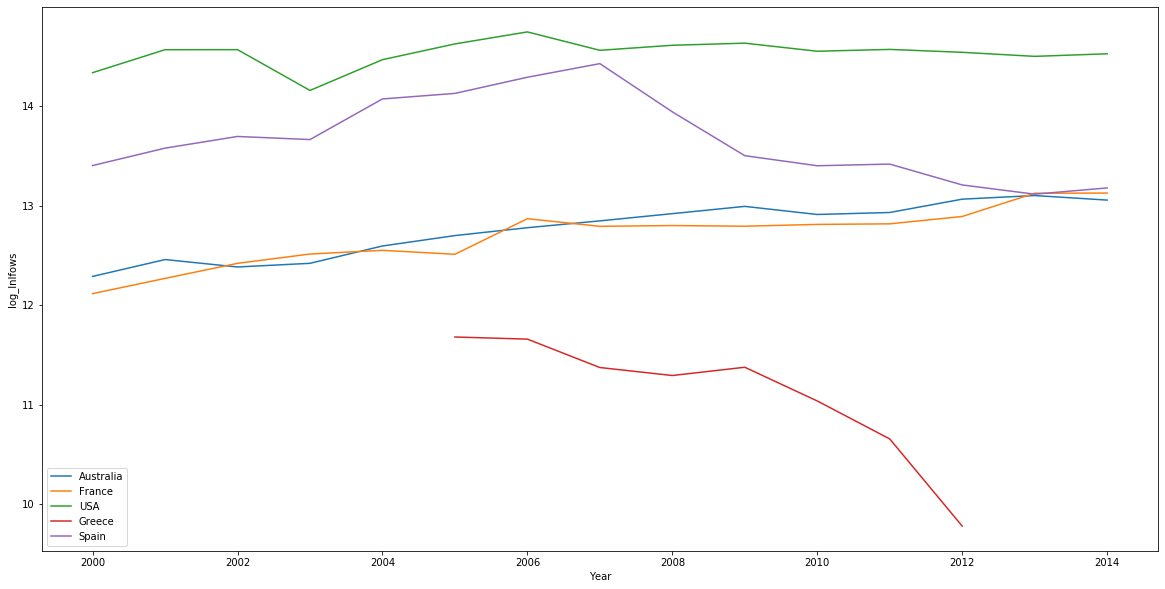

In [35]:
#Evolution des immigrations entre 2000 et 2018
plt.figure(figsize=(20,10))
plt.plot(Y_inflows.loc['Australia'].index, np.log(Y_inflows.loc['Australia'].Value))
plt.plot(Y_inflows.loc['France'].index, np.log(Y_inflows.loc['France'].Value))
plt.plot(Y_inflows.loc['United States'].index, np.log(Y_inflows.loc['United States'].Value))
plt.plot(Y_inflows.loc['Greece'].index, np.log(Y_inflows.loc['Greece'].Value))
plt.plot(Y_inflows.loc['Spain'].index, np.log(Y_inflows.loc['Spain'].Value))
plt.legend(['Australia','France', 'USA', 'Greece', 'Spain'])
plt.xlabel('Year')
plt.ylabel('log_Inlfows')
plt.show()

Generally speaking, inflows tend to increase in most of the countries. That seems relevant as globalisation has been more and more widespread over the past 20 years. Means of transportation are more efficents, as boundaries are way more open. Thus, expatriation is easier, and people are more keen to take the risk. Nevertheless, some countries display a negative evolution of their inflows. That's the case of Greece and Spain. Those countries are very useful as they could help us to determine the variables that influence most immigration.

We can try to plot the time series of Employment rate and Governement debt, and see if there is any obvious correlation beetween those variables and inflows

One way to analyse this is to take the unemployment rate global (men and women). We can also make the distinction between foreign born and native born. The forme could certainly have a deeper impact on the inflows than the latter. 

### Unemployment Rate

In [36]:
UnempRates = Erates[Erates.Rate == 'Unemployment rate']
UnempRates = UnempRates[Erates.Gender == 'Total']

/home/eustache/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [37]:
UnempRates.nunique()

Country              35
Place of birth        2
Gender                1
Rate                  1
Year                 19
Unit                  1
PowerCode             1
Reference Period      0
Value               206
Flags                 0
dtype: int64

In [38]:
UnempRates = UnempRates.set_index([UnempRates.Country,UnempRates.Year])

In [39]:
UnempRates.loc['Australia'].index.unique()

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64', name='Year')

In [40]:
UnempRates.loc['Australia'][UnempRates.loc['Australia']['Place of birth']== 'Foreign-born'].head()

,Country,Place of birth,Gender,Rate,Year,Unit,PowerCode,Reference Period,Value,Flags
Year,,,,,,,,,,
2000,Australia,Foreign-born,Total,Unemployment rate,2000,Percentage,Units,NaN,6.7,NaN
2001,Australia,Foreign-born,Total,Unemployment rate,2001,Percentage,Units,NaN,7.3,NaN
2002,Australia,Foreign-born,Total,Unemployment rate,2002,Percentage,Units,NaN,6.8,NaN
2003,Australia,Foreign-born,Total,Unemployment rate,2003,Percentage,Units,NaN,6.4,NaN
2004,Australia,Foreign-born,Total,Unemployment rate,2004,Percentage,Units,NaN,5.5,NaN


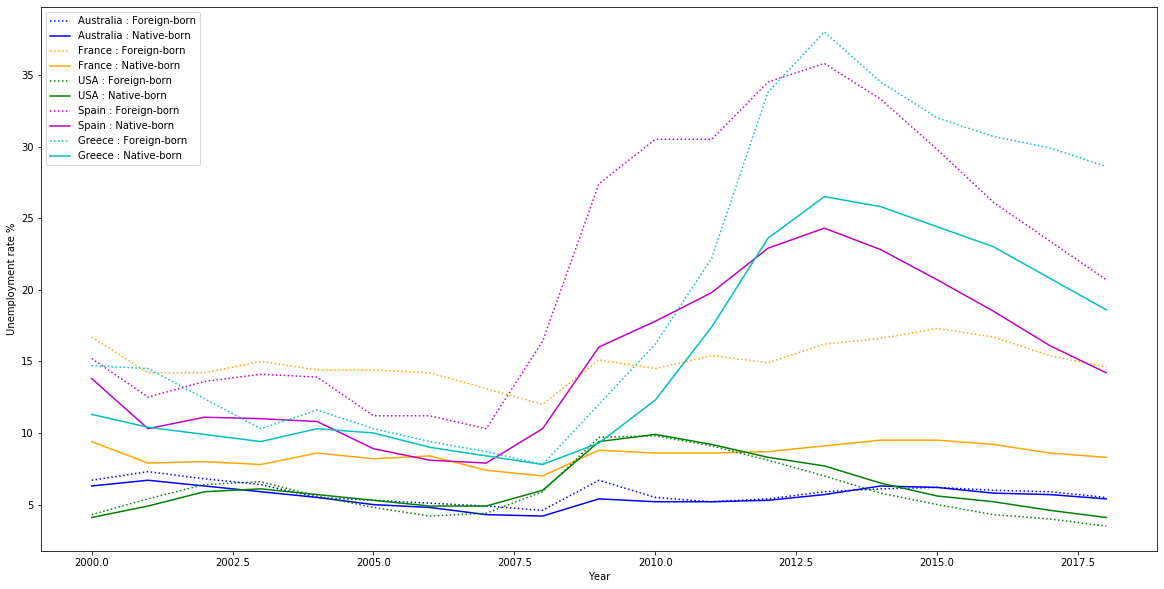

In [41]:
#Evolution of unemployment rate between 2000 and 2018
plt.figure(figsize=(20,10))

plt.plot(UnempRates.loc['Australia'].index.unique(), UnempRates.loc['Australia'][UnempRates.loc['Australia']['Place of birth']== 'Foreign-born'].Value, linestyle = ':', color = 'b' )
plt.plot(UnempRates.loc['Australia'].index.unique(), UnempRates.loc['Australia'][UnempRates.loc['Australia']['Place of birth']== 'Native-born'].Value, linestyle = '-', color = 'b' )

plt.plot(UnempRates.loc['France'].index.unique(), UnempRates.loc['France'][UnempRates.loc['France']['Place of birth']== 'Foreign-born'].Value, linestyle = ':', color = 'orange' )
plt.plot(UnempRates.loc['France'].index.unique(), UnempRates.loc['France'][UnempRates.loc['France']['Place of birth']== 'Native-born'].Value, linestyle = '-', color = 'orange' )

plt.plot(UnempRates.loc['United States'].index.unique(), UnempRates.loc['United States'][UnempRates.loc['United States']['Place of birth']== 'Foreign-born'].Value, linestyle = ':', color = 'g' )
plt.plot(UnempRates.loc['United States'].index.unique(), UnempRates.loc['United States'][UnempRates.loc['United States']['Place of birth']== 'Native-born'].Value, linestyle = '-', color = 'g' )

plt.plot(UnempRates.loc['Spain'].index.unique(), UnempRates.loc['Spain'][UnempRates.loc['Spain']['Place of birth']== 'Foreign-born'].Value, linestyle = ':', color = 'm' )
plt.plot(UnempRates.loc['Spain'].index.unique(), UnempRates.loc['Spain'][UnempRates.loc['Spain']['Place of birth']== 'Native-born'].Value, linestyle = '-', color = 'm' )

plt.plot(UnempRates.loc['Greece'].index.unique(), UnempRates.loc['Greece'][UnempRates.loc['Greece']['Place of birth']== 'Foreign-born'].Value, linestyle = ':', color = 'c' )
plt.plot(UnempRates.loc['Greece'].index.unique(), UnempRates.loc['Greece'][UnempRates.loc['Greece']['Place of birth']== 'Native-born'].Value, linestyle = '-', color = 'c' )


plt.legend(['Australia : Foreign-born', 'Australia : Native-born',
           'France : Foreign-born', 'France : Native-born',
           'USA : Foreign-born', 'USA : Native-born',
           'Spain : Foreign-born', 'Spain : Native-born',
           'Greece : Foreign-born', 'Greece : Native-born'])
plt.xlabel('Year')
plt.ylabel('Unemployment rate %')
plt.show()

As expected, Australia and the USA display a low unemployment rate. It doesn't really matter if you are a foreign born or a native born. That's certainly why immigration is strong in those kind of countries. Immigrants have hagh chances of getting a job there, and there seems to have very few discriminations between foreigners or natives. 

France on the contrary have a pretty high rate of unemployement. Morover, it seems to have an high discrimintation between natives and foreigners. Latters have an higher unemployment rate. So, immigrants are likely to have more difficulties of getting a job in France compared to Australia. Nevertheless, we have seen that inflows are pretty similar between France and Australia. Therefore, even though unemployment rate could be a good explanative variable, there are some others. We can think for exemple of healthcare or environment.  

Finally, Greece and Spain have a very high unemployment rate, especially for foreigners. We can see for bouth countries a peak that arises between 2007 and 2012. This period coincides exactly to the drop of inflows in theses countries. So, we can assume that there is a direct negative correlation between unemployment and inflows. 

We will focus our analysis on the Total central government debt % of GDP 

### Goverment Debt

In [42]:
DebtRates = Gdebt[Gdebt.Variable == 'Total central government debt % of GDP']
DebtRates = DebtRates[DebtRates.Type == 'Stocks: Outstanding amounts']
DebtRates = DebtRates.set_index([DebtRates.Country,DebtRates['Time period']])

In [43]:
DebtRates

Country                         Type Frequency  \
Country   Time period                                                     
Australia 2000         Australia  Stocks: Outstanding amounts    Annual   
          2001         Australia  Stocks: Outstanding amounts    Annual   
          2002         Australia  Stocks: Outstanding amounts    Annual   
          2003         Australia  Stocks: Outstanding amounts    Annual   
          2004         Australia  Stocks: Outstanding amounts    Annual   
...                          ...                          ...       ...   
Slovenia  2006          Slovenia  Stocks: Outstanding amounts    Annual   
          2007          Slovenia  Stocks: Outstanding amounts    Annual   
          2008          Slovenia  Stocks: Outstanding amounts    Annual   
          2009          Slovenia  Stocks: Outstanding amounts    Annual   
          2010          Slovenia  Stocks: Outstanding amounts    Annual   

                             Unit                                Variable  \
Country   Time period                                                       
Australia 2000         Percentage  Total central government debt % of GDP   
          2001         Percentage  Total central government debt % of GDP   
          2002         Percentage  Total central government debt % of GDP   
          2003         Percentage  Total central government debt % of GDP   
          2004         Percentage  Total central government debt % of GDP   
...                           ...                                     ...   
Slovenia  2006         Percentage  Total central government debt % of GDP   
          2007         Percentage  Total central government debt % of GDP   
          2008         Percentage  Total central government debt % of GDP   
          2009         Percentage  Total central government debt % of GDP   
          2010         Percentage  Total central government debt % of GDP   

                       Time period   Value  Flags  
Country   Time period                              
Australia 2000                2000  11.361    NaN  
          2001                2001   9.552    NaN  
          2002                2002   8.576    NaN  
          2003                2003   7.549    NaN  
          2004                2004   6.716    NaN  
...                            ...     ...    ...  
Slovenia  2006                2006  25.782    NaN  
          2007                2007  23.207    NaN  
          2008                2008  21.188    NaN  
          2009                2009  33.628    NaN  
          2010                2010  36.023    NaN  

[370 rows x 8 columns]

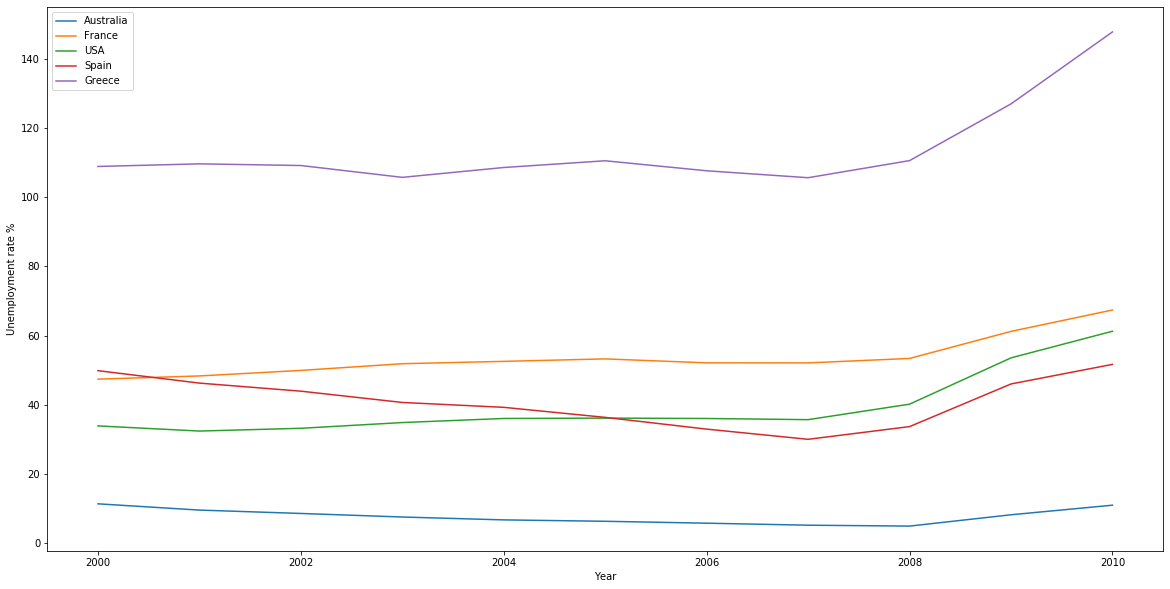

In [44]:
#Evolution of Governement debt rate (% of GDP) between 2000 and 2018
plt.figure(figsize=(20,10))

plt.plot(DebtRates.loc['Australia'].index, DebtRates.loc['Australia'].Value)
plt.plot(DebtRates.loc['France'].index, DebtRates.loc['France'].Value)
plt.plot(DebtRates.loc['United States'].index, DebtRates.loc['United States'].Value)
plt.plot(DebtRates.loc['Spain'].index, DebtRates.loc['Spain'].Value)
plt.plot(DebtRates.loc['Greece'].index, DebtRates.loc['Greece'].Value)

plt.legend(['Australia',
           'France',
           'USA',
           'Spain',
           'Greece'])
plt.xlabel('Year')
plt.ylabel('Unemployment rate %')
plt.show()

### Health

In [45]:
health['Financing scheme'].unique()

array(['All financing schemes', 'Government/compulsory schemes',
       'Voluntary health care payment schemes',
       'Household out-of-pocket payments'], dtype=object)

In [46]:
health['Measure'].unique()

array(['Share of gross domestic product',
       'Share of current expenditure on health',
       'Per capita, current prices',
       'Per capita, current prices, current PPPs'], dtype=object)

In [47]:
health['Function'].unique()

array(['Current expenditure on health (all functions)',
       'Inpatient curative and rehabilitative care',
       'Outpatient curative and rehabilitative care',
       'Long-term care (health)',
       'Ancillary services (non-specified by function)',
       'Medical goods (non-specified by function)', 'Preventive care',
       'Governance and health system and financing administration',
       'Other health care services unknown'], dtype=object)

As a first analysis, we can focus on the share of gross product each country choose to invest in health

In [48]:
HealthRate  = health[health['Financing scheme'] == 'All financing schemes' ]
HealthRate  = HealthRate[HealthRate['Measure'] == 'Share of gross domestic product' ]
HealthRate  = HealthRate[HealthRate['Function'] == 'Current expenditure on health (all functions)' ]
HealthRate = HealthRate.set_index([HealthRate.Country,HealthRate.Year])

In [49]:
HealthRate.head()

Financing scheme  \
Country Year                          
Denmark 2010  All financing schemes   
        2011  All financing schemes   
        2012  All financing schemes   
        2013  All financing schemes   
        2014  All financing schemes   

                                                   Function       Provider  \
Country Year                                                                 
Denmark 2010  Current expenditure on health (all functions)  All providers   
        2011  Current expenditure on health (all functions)  All providers   
        2012  Current expenditure on health (all functions)  All providers   
        2013  Current expenditure on health (all functions)  All providers   
        2014  Current expenditure on health (all functions)  All providers   

                                      Measure  Country  Year        Unit  \
Country Year                                                               
Denmark 2010  Share of gross domestic product  Denmark  2010  Percentage   
        2011  Share of gross domestic product  Denmark  2011  Percentage   
        2012  Share of gross domestic product  Denmark  2012  Percentage   
        2013  Share of gross domestic product  Denmark  2013  Percentage   
        2014  Share of gross domestic product  Denmark  2014  Percentage   

             PowerCode  Reference Period   Value  Flags  
Country Year                                             
Denmark 2010     Units               NaN  10.333  Break  
        2011     Units               NaN  10.153    NaN  
        2012     Units               NaN  10.241    NaN  
        2013     Units               NaN  10.170    NaN  
        2014     Units               NaN  10.172    NaN

In [50]:
HealthRate[HealthRate.Value == HealthRate.Value.max()]

,,Financing scheme,Function,Provider,Measure,Country,Year,Unit,PowerCode,Reference Period,Value,Flags
Country,Year,,,,,,,,,,,
United States,2016,All financing schemes,Current expenditure on health (all functions),All providers,Share of gross domestic product,United States,2016,Percentage,Units,NaN,17.121,NaN


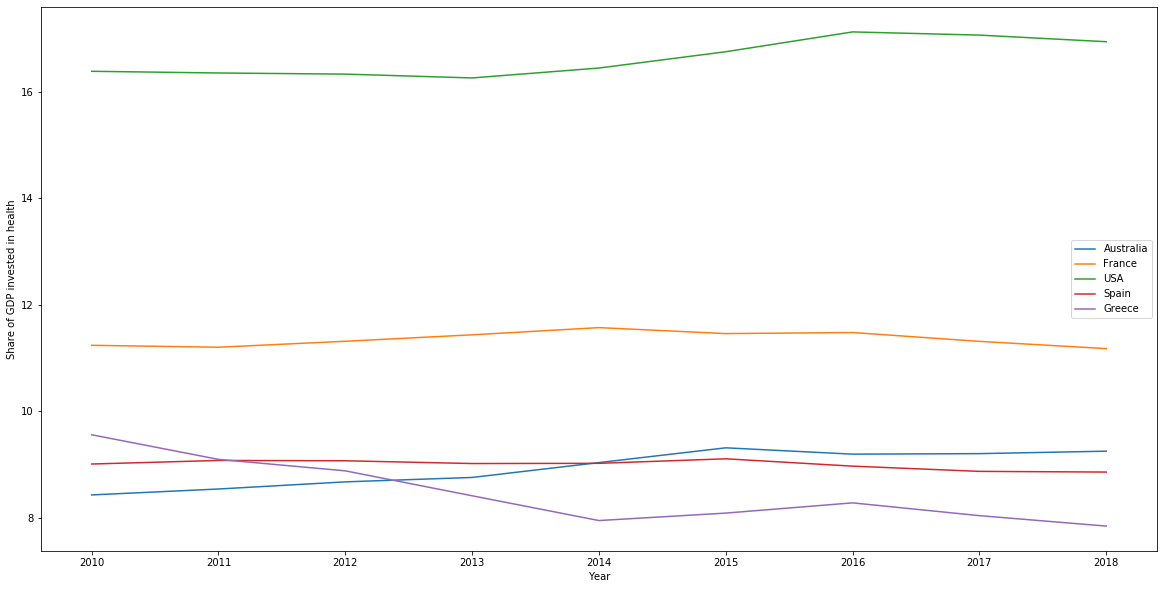

In [51]:
plt.figure(figsize=(20,10))

plt.plot(HealthRate.loc['Australia'].index, HealthRate.loc['Australia'].Value)
plt.plot(HealthRate.loc['France'].index, HealthRate.loc['France'].Value)
plt.plot(HealthRate.loc['United States'].index, HealthRate.loc['United States'].Value)
plt.plot(HealthRate.loc['Spain'].index, HealthRate.loc['Spain'].Value)
plt.plot(HealthRate.loc['Greece'].index, HealthRate.loc['Greece'].Value)

plt.legend(['Australia',
           'France',
           'USA',
           'Spain',
           'Greece'])
plt.xlabel('Year')
plt.ylabel('Share of GDP invested in health')
plt.show()

# Some maps 

In [52]:
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)

world.loc[4,['name']] = 'United States'
world.loc[96,['name']] = 'Korea'
world.loc[152,['name']] = 'Slovak Republic'
world.loc[153,['name']] = 'Czech Republic'

In [53]:
inflows_values = geopandas.GeoDataFrame(inflows[inflows.Year == 2014].groupby('Country').agg({'Value': sum}))

In [54]:
world_inflows = world.merge(inflows_values.Value, left_on=world.name, right_on=inflows_values.index, how='left')

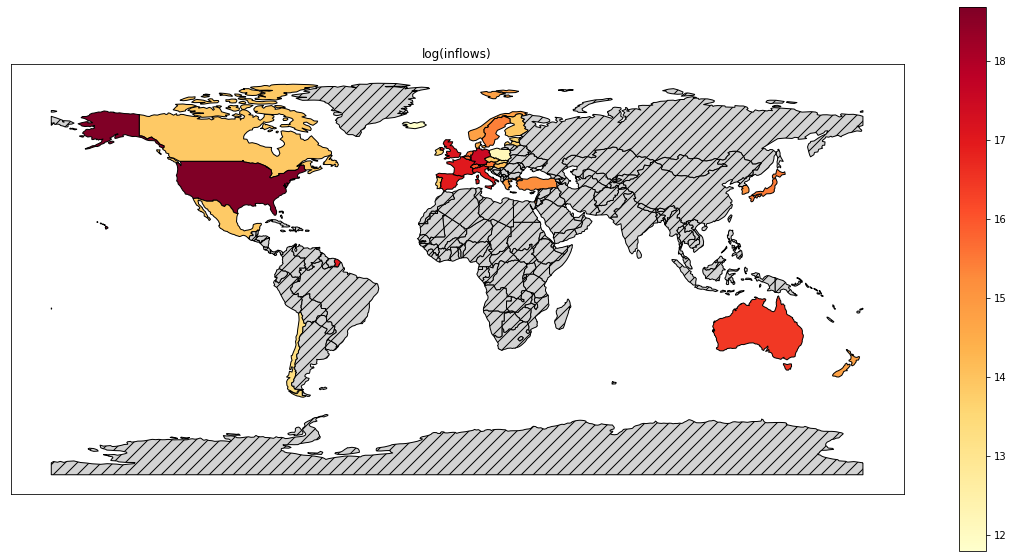

In [55]:
f, ax = plt.subplots(figsize=(20,10))
world_inflows['log_value'] = np.log(world_inflows.Value)

mini = min(world_inflows.dropna(subset=['log_value']).log_value)
maxi = max(world_inflows.dropna(subset=['log_value']).log_value)

world_inflows.dropna(subset=['Value']).plot(ax=ax,
                                            column='log_value',
                                            cmap='YlOrRd',
                                            edgecolor='k',
                                            legend=True,
                                           )

world_inflows[pd.isna(world_inflows.Value)].plot(ax=ax,
                                                 edgecolor='k',
                                                 facecolor='lightgrey',
                                                 hatch="//")

ax.set_xticks([])
ax.set_yticks([])

ax.set_aspect('equal')
ax.title.set_text('log(inflows)')
ax.set_facecolor('white')

In [56]:
erates_values = geopandas.GeoDataFrame(Erates[(Erates.Year == 2014) & 
                                              (Erates.Rate == 'Unemployment rate') & 
                                              (Erates['Place of birth'] == 'Foreign-born')]
                                       .groupby('Country').agg({'Value': np.mean}))

In [57]:
world_erates = world.merge(erates_values.Value, left_on=world.name, right_on=erates_values.index, how='left')

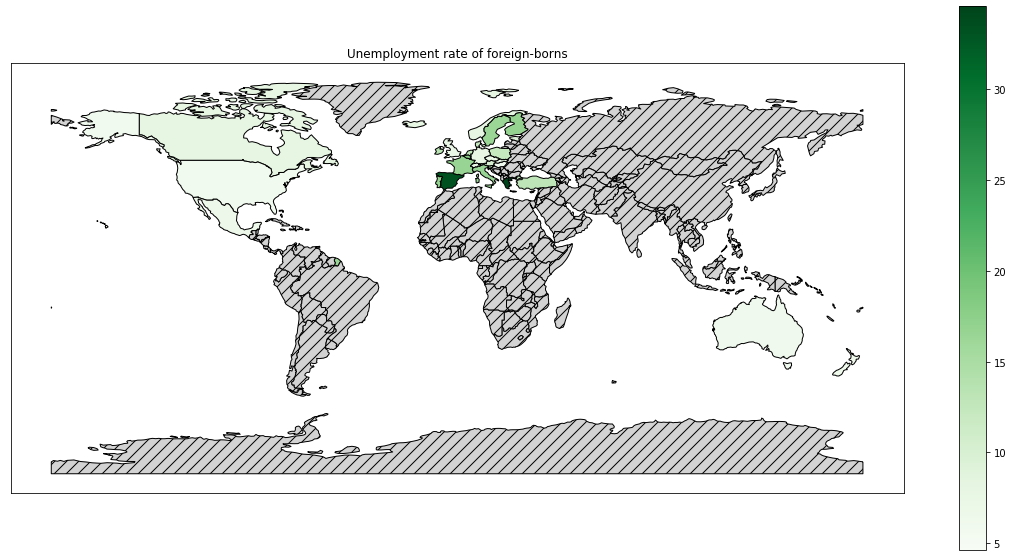

In [58]:
f, ax = plt.subplots(figsize=(20,10))


mini = min(world_erates.dropna(subset=['Value']).Value)
maxi = max(world_erates.dropna(subset=['Value']).Value)

world_erates.dropna(subset=['Value']).plot(ax=ax,
                                            column='Value',
                                            cmap='Greens',
                                            edgecolor='k',
                                            legend=True,
                                           )

world_erates[pd.isna(world_erates.Value)].plot(ax=ax,
                                                 edgecolor='k',
                                                 facecolor='lightgrey',
                                                 hatch="//")

ax.set_xticks([])
ax.set_yticks([])

ax.set_aspect('equal')
ax.title.set_text('Unemployment rate of foreign-borns')
ax.set_facecolor('white')

In [59]:
debt_values = geopandas.GeoDataFrame(Gdebt[(Gdebt['Time period'] == 2010) & 
                                           (Gdebt.Variable == 'Total central government debt % of GDP')]
                                     .groupby('Country').agg({'Value': np.mean}))

In [60]:
world_debts = world.merge(debt_values.Value, left_on=world.name, right_on=debt_values.index, how='left')

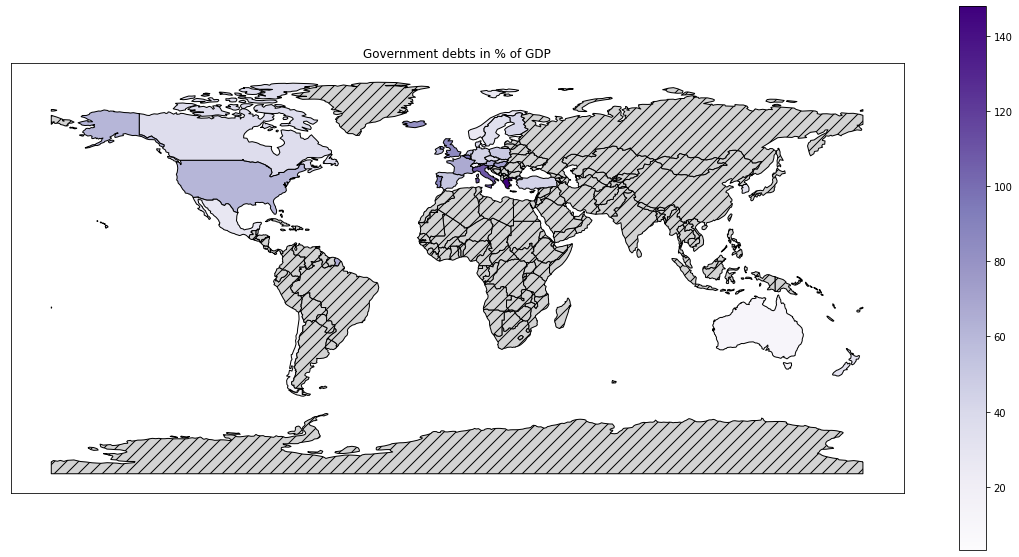

In [61]:
f, ax = plt.subplots(figsize=(20,10))


mini = min(world_debts.dropna(subset=['Value']).Value)
maxi = max(world_debts.dropna(subset=['Value']).Value)

world_debts.dropna(subset=['Value']).plot(ax=ax,
                                            column='Value',
                                            cmap='Purples',
                                            edgecolor='k',
                                            legend=True,
                                           )

world_debts[pd.isna(world_debts.Value)].plot(ax=ax,
                                                 edgecolor='k',
                                                 facecolor='lightgrey',
                                                 hatch="//")

ax.set_xticks([])
ax.set_yticks([])

ax.set_aspect('equal')
ax.title.set_text('Government debts in % of GDP')
ax.set_facecolor('white')

# Score metric

In [62]:
df_y = inflows.groupby(['Country', 'Year']).agg({'Value':sum}).reset_index()

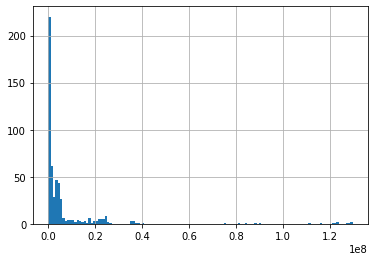

In [63]:
df_y.Value.hist(bins=130)

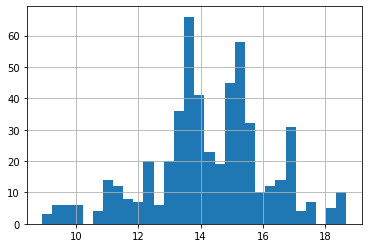

In [64]:
df_y.Value.map(np.log).hist(bins=30)

We are trying to predict the inflows per year for each counrty available in the database. Inflows are positive values that can be really high, we then suggest to work with the logarithm of inflows. Doing so, we can predict positive. Using a loss like *MLSE* (mean logarithmic squared error), it deals with the scale issue. For instance, if we predict $2000$ instead of $1000$, we are making a big mistake, and if we are predicting $101000$ instead of $100000$ we have the same error in absolute, but it is a smaller error relativily to the target value. We then suggest a loss function :
$$ L(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} \left(log(1+y) - log(1+\hat{y})\right)^2$$

In [71]:
inflows.head()

,Unnamed: 0,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,15,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2015,2015,3323.0,NaN,NaN
1,16,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2016,2016,3197.0,NaN,NaN
2,17,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2017,2017,3566.0,NaN,NaN
3,18,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2018,2018,3783.0,NaN,NaN
4,32,AFG,Afghanistan,B12,Outflows of foreign population by nationality,TOT,Total,AUS,Australia,2015,2015,100.0,NaN,NaN


In [72]:
bis  = inflows.groupby(['Country','Year']).agg({'Value':sum})

In [73]:
df = pd.merge(bis, Erates, left_on=['Country','Year'], right_on=['Country','Year'], how='left')

In [74]:
df.head()

,Country,Year,Value_x,Place of birth,Gender,Rate,Unit,PowerCode,Reference Period,Value_y,Flags
0,Australia,2015,14256152.0,Foreign-born,Men,Employment rate,Percentage,Units,NaN,78.8,NaN
1,Australia,2015,14256152.0,Foreign-born,Men,Unemployment rate,Percentage,Units,NaN,5.8,NaN
2,Australia,2015,14256152.0,Foreign-born,Men,Participation rate,Percentage,Units,NaN,83.6,NaN
3,Australia,2015,14256152.0,Foreign-born,Women,Employment rate,Percentage,Units,NaN,61.4,NaN
4,Australia,2015,14256152.0,Foreign-born,Women,Unemployment rate,Percentage,Units,NaN,6.8,NaN


# Score metric

In [75]:
from sklearn.metrics import make_scorer

def loss(y_true, y_pred):
    
    if isinstance(y_true, pd.Series):
        y_true = y_true.values

    true = np.log10(np.maximum(1., y_true))
    pred = np.log10(np.maximum(1., y_pred))
    
    loss = np.mean((true - pred)**2)
    
    return loss
    
immi_loss = make_scorer(loss, greater_is_better=False)

# Naive model

In [76]:
inflows = pd.read_csv('data/inflows_test.csv')
# drop_cols = ['CO2','VAR', 'GEN', 'COU', 'YEA', 'Flag Codes']
# inflows = inflows.drop(drop_cols,axis=1)

In [77]:
import os
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline


class FeatureExtractor(object):
    def __init__(self):
        
        self.categorical = ['Country of birth/nationality', 'Variable', 'Gender', 'Country']
        self.numeric =['Year']
        
        self.target_encoder = ce.target_encoder.TargetEncoder()
        
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('category_variables', make_pipeline(self.target_encoder, SimpleImputer(strategy='median')), self.categorical),
                ('numeric_variables', SimpleImputer(strategy='median'), self.numeric)])

    def fit(self, X_df, y_array):
        self.preprocessor.fit(X_df, y_array)

    def transform(self, X_df):
        X_array = self.preprocessor.transform(X_df)
        
        return X_array
    
    def fit_transform(self, X_df, y_array):
        self.fit(X_df, y_array)
        return(self.transform(X_df))

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator


class Regressor(BaseEstimator):
    def __init__(self):
        self.reg = RandomForestRegressor(n_estimators=5)

    def fit(self, X, y):
        self.reg.fit(X, y)

    def predict(self, X):
        return self.reg.predict(X)
    

In [79]:
from sklearn.model_selection import train_test_split
inflows = inflows.dropna(subset=["Value"])
X = inflows[['Country of birth/nationality', 'Variable', 'Gender', 'Country', 'Year']]
y = inflows['Value']
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)
fe = FeatureExtractor()
re = Regressor()
X_array = fe.fit_transform(X,y)
re.fit(X_array, y)

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit

clf = Pipeline(steps=[
    ('preprocessing', fe),
    ('classifier', re)])

cv = GroupShuffleSplit(n_splits=8, test_size=0.25)

scores_merge = -cross_val_score(clf, X, y, groups=X["Country"],scoring=immi_loss, cv=cv)

print("mean: %e (+/- %e)" % (scores_merge.mean(), scores_merge.std()))

mean: 2.066897e+00 (+/- 4.738939e-01)


# Model with merged tables

In [81]:
class FeatureMergeExtractor(object):
    def __init__(self):
        
        
        self.health = pd.read_csv('data/health.csv')
        self.population = pd.read_csv('data/population.csv')
        
        self.population = self.population[['Country', 'Sex', 'Age', 'Time', 'Value']]
        self.population = self.population.rename(columns={"Time": "Year"})
        self.population = self.population[self.population["Sex"].isin(["Men", "Women"]) & (self.population["Age"] == "Total")]
        self.population.loc[:,"Sex"] = self.population["Sex"].map({"Men": 0, "Women": 1})
        self.population = self.population.groupby(["Country", 'Year']).agg({'Value' : "sum"}).reset_index()

        self.health = self.health[['Financing scheme', 'Function', 'Measure', 'Country', 'Year', 'Value']]
        self.health = self.health[(self.health["Function"] == "Current expenditure on health (all functions)") &
                    (self.health["Financing scheme"] == "All financing schemes") &
                    (self.health["Measure"] == "Share of gross domestic product")]
        self.health = self.health.groupby(["Country", "Year"]).agg({"Value": "sum"}).reset_index()

        
        self.categorical = ['Country of birth/nationality', 'Variable', 'Gender', 'Country']
        self.numeric = ['Year', "Value_Health", "Value_Population"]
        
        self.target_encoder = ce.target_encoder.TargetEncoder()
        
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('category_variables', make_pipeline(self.target_encoder, SimpleImputer(strategy='median')), self.categorical),
                ('numeric_variables', SimpleImputer(strategy='median'), self.numeric)])
        
        
    def merge(self, X_df):
        
        X_df = X_df.merge(self.health[["Country", 'Year', 'Value']], how='left', on=["Country", "Year"])   
        X_df = X_df.merge(self.population[["Country", 'Year', 'Value']], how='left', on=["Country", "Year"], sort=False, suffixes=("_Health", '_Population'))
        return(X_df)
        
    
    def fit(self, X_df, y_array):
        
        X_df = self.merge(X_df)
        self.preprocessor.fit(X_df, y_array)

    def transform(self, X_df):
        
        X_df = self.merge(X_df)
        X_array = self.preprocessor.transform(X_df)
        return X_array
    
    def fit_transform(self, X_df, y_array):
        self.fit(X_df, y_array)
        return(self.transform(X_df))

In [82]:
inflows = inflows.dropna(subset=["Value"])
X = inflows[['Country of birth/nationality', 'Variable', 'Gender', 'Country', 'Year']]
y = inflows['Value']
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)
fme = FeatureMergeExtractor()
re = Regressor()
X_array = fme.fit_transform(X,y)
re.fit(X_array, y)

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit

clf = Pipeline(steps=[
    ('preprocessing', fme),
    ('classifier', re)])

cv = GroupShuffleSplit(n_splits=8, test_size=0.25)

scores_merge = -cross_val_score(clf, X, y, groups=X["Country"],scoring=immi_loss, cv=cv)

print("mean: %e (+/- %e)" % (scores_merge.mean(), scores_merge.std()))

mean: 1.906103e+00 (+/- 3.373593e-01)
